In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import librarys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [7]:
# Assuming your CSV file is named 'data.csv'
data = pd.read_csv('/content/Cleaned_online_shoppers_intention.csv')

In [8]:
data

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,OperatingSystems,...,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,1,0,0.0,0,0.0,64.000000,0.000000,0.000000,0.0,2,...,False,0,1,0,0,0,0,0,0,0
1,4,0,0.0,0,0.0,627.500000,0.020000,0.000000,0.0,Other,...,False,0,1,0,0,0,0,0,0,0
2,5,0,0.0,0,0.0,154.216667,0.015789,0.000000,0.0,2,...,False,0,1,0,0,0,0,0,0,0
3,8,0,0.0,0,0.0,37.000000,0.000000,0.000000,0.8,2,...,False,0,1,0,0,0,0,0,0,0
4,9,0,0.0,0,0.0,738.000000,0.000000,0.000000,0.4,2,...,False,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9409,12324,0,0.0,1,0.0,503.000000,0.000000,0.000000,0.0,2,...,False,0,0,0,0,0,0,1,0,0
9410,12325,3,145.0,0,0.0,1783.791667,0.007143,12.241717,0.0,Other,...,False,1,0,0,0,0,0,0,0,0
9411,12326,0,0.0,0,0.0,465.750000,0.000000,0.000000,0.0,Other,...,False,0,0,0,0,0,0,1,0,0
9412,12328,4,75.0,0,0.0,346.000000,0.000000,0.000000,0.0,2,...,False,0,0,0,0,0,0,1,0,0


In [12]:
X = data.drop('Revenue', axis=1)  # Features
y = data['Revenue']  # Target variable

LOGISTIC REGRESSION

In [13]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score,classification_report, confusion_matrix


# Assuming 'X' is your features DataFrame, and 'y' is your target variable
# Modify this based on your actual dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Identify categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ... (Rest of the code remains unchanged)

# Function to fit logistic regression model and calculate metrics
def fit_and_evaluate(X_train, X_test, y_train, y_test, features, cutoff):
    model = sm.Logit(y_train, sm.add_constant(X_train[features])).fit(disp=False)

    # Predict using the test set
    y_pred_prob = model.predict(sm.add_constant(X_test[features]))
    y_pred = (y_pred_prob > cutoff).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) != 0 else 0
    validation_error = 1 - accuracy

    return model, accuracy, validation_error, sensitivity, specificity


# Forward Logistic Regression
def forward_selection(X_train, X_test, y_train, y_test, cutoff):
    features = []
    remaining_features = list(X_train.columns)

    val_errors = []
    accuracies = []
    sensitivities = []
    specificities = []

    while remaining_features:
        best_accuracy = 0
        best_feature = None

        for feature in remaining_features:
            current_features = features + [feature]
            model, acc, val_err, sensitivity, specificity = fit_and_evaluate(X_train.astype(float), X_test.astype(float), y_train.astype(float), y_test.astype(float), current_features, cutoff)

            accuracies.append(acc)
            val_errors.append(val_err)
            sensitivities.append(sensitivity)
            specificities.append(specificity)

            if acc > best_accuracy:
                best_accuracy = acc
                best_feature = feature

        if best_feature is not None:
            features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break

    print("Forward Logistic Regression - Selected Features:", features)
    print("Cutoff:", cutoff)
    print("Accuracies:", accuracies)
    print("Validation Errors:", val_errors)
    print("Sensitivities:", sensitivities)
    print("Specificities:", specificities)
    print()

    return accuracies, val_errors, sensitivities, specificities

# Backward Logistic Regression
def backward_elimination(X_train, X_test, y_train, y_test, cutoff):
    features = list(X_train.columns)

    val_errors = []
    accuracies = []
    sensitivities = []
    specificities = []

    while len(features) > 1:
        best_accuracy = 0
        worst_feature = None

        for feature in features:
            current_features = list(set(features) - {feature})
            model, acc, val_err, sensitivity, specificity = fit_and_evaluate(X_train.astype(float), X_test.astype(float), y_train.astype(float), y_test.astype(float), current_features, cutoff)

            accuracies.append(acc)
            val_errors.append(val_err)
            sensitivities.append(sensitivity)
            specificities.append(specificity)

            if acc > best_accuracy:
                best_accuracy = acc
                worst_feature = feature

        if worst_feature is not None:
            features.remove(worst_feature)
        else:
            break

    print("Backward Logistic Regression - Selected Features:", features)
    print("Cutoff:", cutoff)
    print("Accuracies:", accuracies)
    print("Validation Errors:", val_errors)
    print("Sensitivities:", sensitivities)
    print("Specificities:", specificities)
    print()

    return accuracies, val_errors, sensitivities, specificities

# Stepwise Logistic Regression
def stepwise_regression(X_train, X_test, y_train, y_test, cutoff):
    # Initialize selected features
    selected_features = []

    val_errors_stepwise = []
    accuracies_stepwise = []
    sensitivities_stepwise = []
    specificities_stepwise = []

    while len(selected_features) < len(X_train.columns):
        best_accuracy = 0
        best_feature = None

        # Forward step
        for feature in list(X_train.columns):
            if feature not in selected_features:
                current_features = selected_features + [feature]
                model, acc, val_err, sensitivity, specificity = fit_and_evaluate(X_train.astype(float), X_test.astype(float), y_train.astype(float), y_test.astype(float), current_features, cutoff)

                accuracies_stepwise.append(acc)
                val_errors_stepwise.append(val_err)
                sensitivities_stepwise.append(sensitivity)
                specificities_stepwise.append(specificity)

                if acc > best_accuracy:
                    best_accuracy = acc
                    best_feature = feature

        if best_feature is not None:
            selected_features.append(best_feature)
        else:
            break

    print("Stepwise Logistic Regression - Selected Features:", selected_features)
    print("Cutoff:", cutoff)
    print("Accuracies:", accuracies_stepwise)
    print("Validation Errors:", val_errors_stepwise)
    print("Sensitivities:", sensitivities_stepwise)
    print("Specificities:", specificities_stepwise)
    print()

    return accuracies_stepwise, val_errors_stepwise, sensitivities_stepwise, specificities_stepwise

# Define your X_train, X_test, y_train, and y_test before calling the function

# List to store results for each cutoff
results = []

# Perform logistic regression for cutoff 0.5
cutoff = 0.5
accuracies_forward_05, val_errors_forward_05, sensitivities_forward_05, specificities_forward_05 = forward_selection(X_train, X_test, y_train, y_test, cutoff)
accuracies_backward_05, val_errors_backward_05, sensitivities_backward_05, specificities_backward_05 = backward_elimination(X_train, X_test, y_train, y_test, cutoff)
accuracies_stepwise_05, val_errors_stepwise_05, sensitivities_stepwise_05, specificities_stepwise_05 = stepwise_regression(X_train, X_test, y_train, y_test, cutoff)

# Calculate mean for cutoff 0.5
mean_results_forward_05 = {
    'Accuracy': np.mean(accuracies_forward_05),
    'Specificity': np.mean(specificities_forward_05),
    'Validation Error': np.mean(val_errors_forward_05),
    'Sensitivity': np.mean(sensitivities_forward_05)
}

mean_results_backward_05 = {
    'Accuracy': np.mean(accuracies_backward_05),
    'Specificity': np.mean(specificities_backward_05),
    'Validation Error': np.mean(val_errors_backward_05),
    'Sensitivity': np.mean(sensitivities_backward_05)
}

mean_results_stepwise_05 = {
    'Accuracy': np.mean(accuracies_stepwise_05),
    'Specificity': np.mean(specificities_stepwise_05),
    'Validation Error': np.mean(val_errors_stepwise_05),
    'Sensitivity': np.mean(sensitivities_stepwise_05)
}

results.append(('Cutoff 0.5', mean_results_forward_05, mean_results_backward_05, mean_results_stepwise_05))

# Perform logistic regression for cutoff 0.4
cutoff = 0.4
accuracies_forward_04, val_errors_forward_04, sensitivities_forward_04, specificities_forward_04 = forward_selection(X_train, X_test, y_train, y_test, cutoff)
accuracies_backward_04, val_errors_backward_04, sensitivities_backward_04, specificities_backward_04 = backward_elimination(X_train, X_test, y_train, y_test, cutoff)
accuracies_stepwise_04, val_errors_stepwise_04, sensitivities_stepwise_04, specificities_stepwise_04 = stepwise_regression(X_train, X_test, y_train, y_test, cutoff)

# Calculate mean for cutoff 0.4
mean_results_forward_04 = {
    'Accuracy': np.mean(accuracies_forward_04),
    'Specificity': np.mean(specificities_forward_04),
    'Validation Error': np.mean(val_errors_forward_04),
    'Sensitivity': np.mean(sensitivities_forward_04)
}

mean_results_backward_04 = {
    'Accuracy': np.mean(accuracies_backward_04),
    'Specificity': np.mean(specificities_backward_04),
    'Validation Error': np.mean(val_errors_backward_04),
    'Sensitivity': np.mean(sensitivities_backward_04)
}

mean_results_stepwise_04 = {
    'Accuracy': np.mean(accuracies_stepwise_04),
    'Specificity': np.mean(specificities_stepwise_04),
    'Validation Error': np.mean(val_errors_stepwise_04),
    'Sensitivity': np.mean(sensitivities_stepwise_04)
}

results.append(('Cutoff 0.4', mean_results_forward_04, mean_results_backward_04, mean_results_stepwise_04))

# Perform logistic regression for cutoff 0.3
cutoff = 0.3
accuracies_forward_03, val_errors_forward_03, sensitivities_forward_03, specificities_forward_03 = forward_selection(X_train, X_test, y_train, y_test, cutoff)
accuracies_backward_03, val_errors_backward_03, sensitivities_backward_03, specificities_backward_03 = backward_elimination(X_train, X_test, y_train, y_test, cutoff)
accuracies_stepwise_03, val_errors_stepwise_03, sensitivities_stepwise_03, specificities_stepwise_03 = stepwise_regression(X_train, X_test, y_train, y_test, cutoff)

# Calculate mean for cutoff 0.3
mean_results_forward_03 = {
    'Accuracy': np.mean(accuracies_forward_03),
    'Specificity': np.mean(specificities_forward_03),
    'Validation Error': np.mean(val_errors_forward_03),
    'Sensitivity': np.mean(sensitivities_forward_03)
}

mean_results_backward_03 = {
    'Accuracy': np.mean(accuracies_backward_03),
    'Specificity': np.mean(specificities_backward_03),
    'Validation Error': np.mean(val_errors_backward_03),
    'Sensitivity': np.mean(sensitivities_backward_03)
}

mean_results_stepwise_03 = {
    'Accuracy': np.mean(accuracies_stepwise_03),
    'Specificity': np.mean(specificities_stepwise_03),
    'Validation Error': np.mean(val_errors_stepwise_03),
    'Sensitivity': np.mean(sensitivities_stepwise_03)
}

results.append(('Cutoff 0.3', mean_results_forward_03, mean_results_backward_03, mean_results_stepwise_03))

# Perform logistic regression for cutoff 0.8
cutoff = 0.8
accuracies_forward_08, val_errors_forward_08, sensitivities_forward_08, specificities_forward_08 = forward_selection(X_train, X_test, y_train, y_test, cutoff)
accuracies_backward_08, val_errors_backward_08, sensitivities_backward_08, specificities_backward_08 = backward_elimination(X_train, X_test, y_train, y_test, cutoff)
accuracies_stepwise_08, val_errors_stepwise_08, sensitivities_stepwise_08, specificities_stepwise_08 = stepwise_regression(X_train, X_test, y_train, y_test, cutoff)

# Calculate mean for cutoff 0.8
mean_results_forward_08 = {
    'Accuracy': np.mean(accuracies_forward_08),
    'Specificity': np.mean(specificities_forward_08),
    'Validation Error': np.mean(val_errors_forward_08),
    'Sensitivity': np.mean(sensitivities_forward_08)
}

mean_results_backward_08 = {
    'Accuracy': np.mean(accuracies_backward_08),
    'Specificity': np.mean(specificities_backward_08),
    'Validation Error': np.mean(val_errors_backward_08),
    'Sensitivity': np.mean(sensitivities_backward_08)
}

mean_results_stepwise_08 = {
    'Accuracy': np.mean(accuracies_stepwise_08),
    'Specificity': np.mean(specificities_stepwise_08),
    'Validation Error': np.mean(val_errors_stepwise_08),
    'Sensitivity': np.mean(sensitivities_stepwise_08)
}

results.append(('Cutoff 0.8', mean_results_forward_08, mean_results_backward_08, mean_results_stepwise_08))

# Print mean results for each cutoff
for cutoff, mean_results_forward, mean_results_backward, mean_results_stepwise in results:
    print(f"Mean Results for {cutoff} - Forward Logistic Regression:")
    print("Accuracy:", mean_results_forward['Accuracy'])
    print("Specificity:", mean_results_forward['Specificity'])
    print("Validation Error:", mean_results_forward['Validation Error'])
    print("Sensitivity:", mean_results_forward['Sensitivity'])
    print()

    print(f"Mean Results for {cutoff} - Backward Logistic Regression:")
    print("Accuracy:", mean_results_backward['Accuracy'])
    print("Specificity:", mean_results_backward['Specificity'])
    print("Validation Error:", mean_results_backward['Validation Error'])
    print("Sensitivity:", mean_results_backward['Sensitivity'])
    print()

    print(f"Mean Results for {cutoff} - Stepwise Logistic Regression:")
    print("Accuracy:", mean_results_stepwise['Accuracy'])
    print("Specificity:", mean_results_stepwise['Specificity'])
    print("Validation Error:", mean_results_stepwise['Validation Error'])
    print("Sensitivity:", mean_results_stepwise['Sensitivity'])
    print()






Forward Logistic Regression - Selected Features: ['PageValues', 'VisitorType_Returning_Visitor', 'Informational', 'Month_Nov', 'Informational_Duration', 'BounceRates', 'Unnamed: 0', 'ProductRelated_Duration', 'Month_May', 'SpecialDay', 'TrafficType', 'Weekend', 'Region_3', 'Month_Feb', 'Administrative_Duration', 'Month_June', 'Administrative', 'Month_Dec', 'Month_Oct', 'Month_Sep', 'Month_Jul', 'OperatingSystems_Other', 'Browser', 'Month_Mar', 'Region_Other']
Cutoff: 0.5
Accuracies: [0.8262531860662702, 0.8262531860662702, 0.8262531860662702, 0.8262531860662702, 0.8262531860662702, 0.8249787595581988, 0.8262531860662702, 0.8814783347493628, 0.8262531860662702, 0.8262531860662702, 0.8262531860662702, 0.8262531860662702, 0.8262531860662702, 0.8262531860662702, 0.8262531860662702, 0.8262531860662702, 0.8262531860662702, 0.8262531860662702, 0.8262531860662702, 0.8262531860662702, 0.8262531860662702, 0.8262531860662702, 0.8262531860662702, 0.8262531860662702, 0.8262531860662702, 0.881478334

# **kNN**


Threshold: 0.5
Min Error rate: 0.1407328730748805
Best K: 7


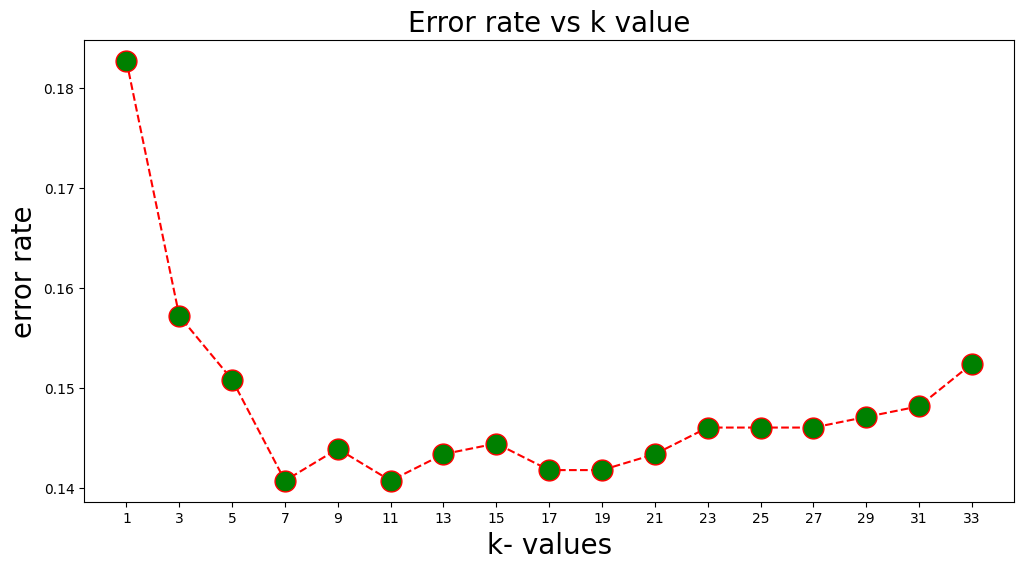

kNN results for 0.5 cut-off
Accuracy: 0.86
Sensitivity: 0.31
Specificity: 0.98


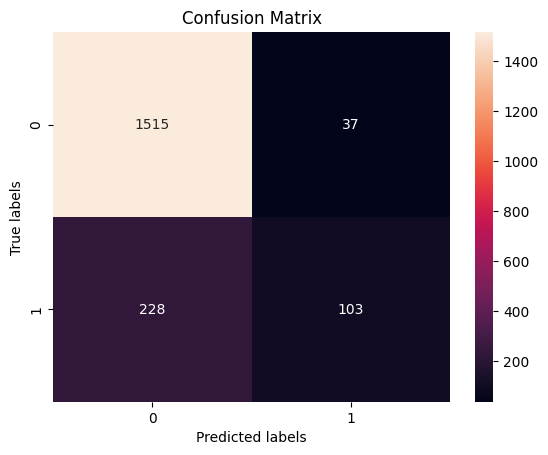


Threshold: 0.4
Min Error rate: 0.1407328730748805
Best K: 7


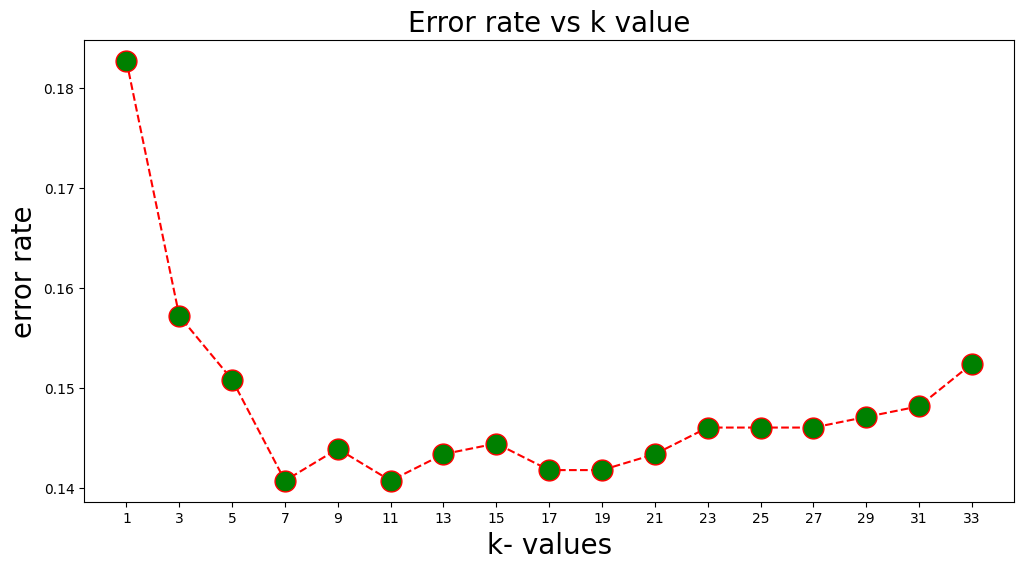

kNN results for 0.4 cut-off
Accuracy: 0.85
Sensitivity: 0.42
Specificity: 0.94


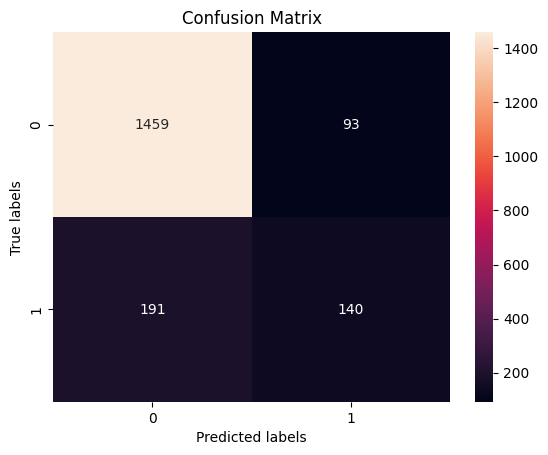


Threshold: 0.3
Min Error rate: 0.1407328730748805
Best K: 7


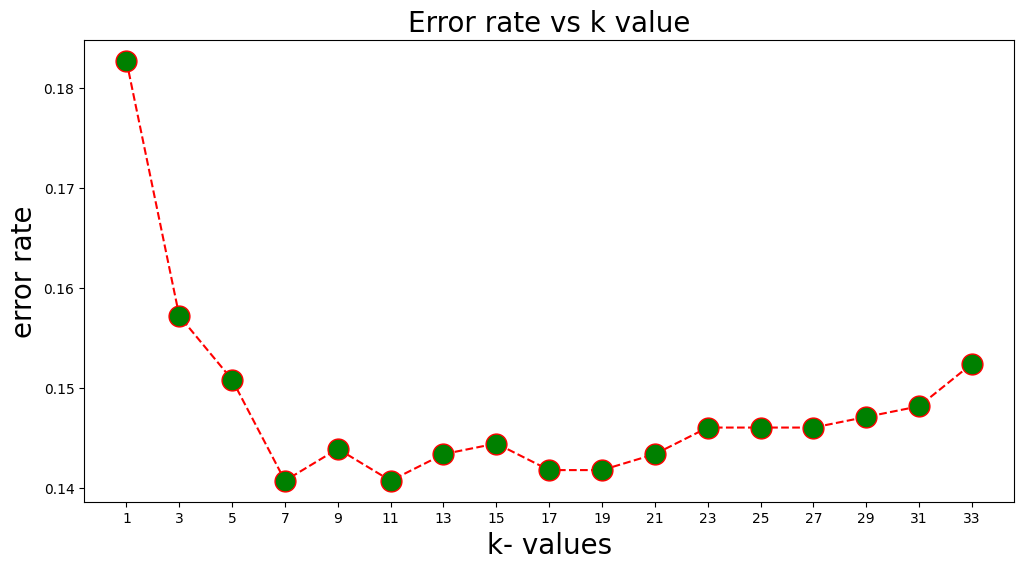

kNN results for 0.3 cut-off
Accuracy: 0.85
Sensitivity: 0.42
Specificity: 0.94


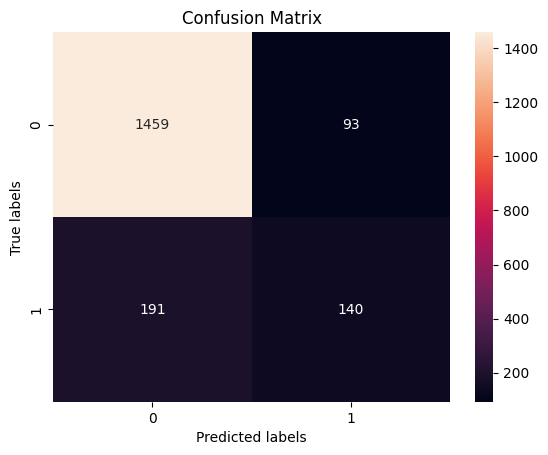


Threshold: 0.8
Min Error rate: 0.1407328730748805
Best K: 7


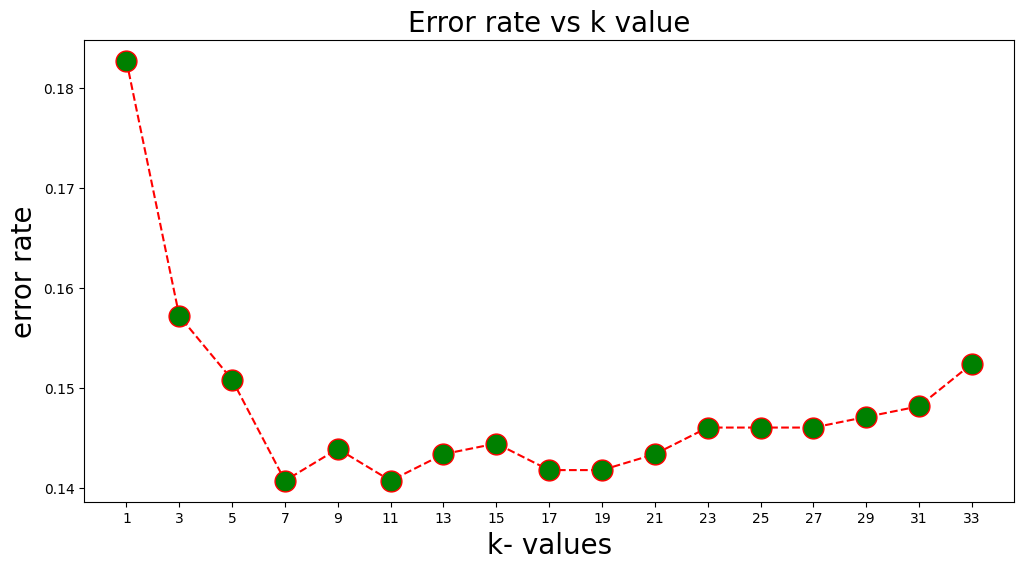

kNN results for 0.8 cut-off
Accuracy: 0.84
Sensitivity: 0.14
Specificity: 0.99


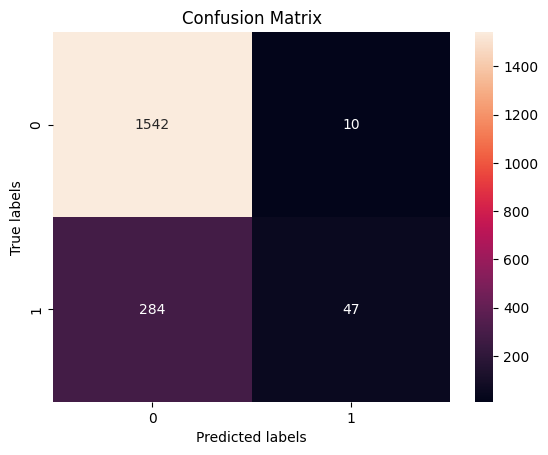

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

selected_features_sw = ['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated_Duration',
 'BounceRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Month_Dec',
 'Month_Feb',
 'Month_Jul',
 'Month_June',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep']
# One-hot encode categorical variables
X = pd.get_dummies(data[selected_features_sw], drop_first=True)
y = data['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define thresholds
thresholds = [0.5, 0.4, 0.3, 0.8]

for threshold in thresholds:
    print(f"\nThreshold: {threshold}")

    error_rate = []

    for i in range(1, 35, 2):
        clf = KNeighborsClassifier(n_neighbors=i)
        clf.fit(X_train_scaled, y_train)
        predict_i = clf.predict(X_test_scaled)
        y_pred = (clf.predict_proba(X_test_scaled)[:, 1] > threshold).astype('float')
        error_rate.append(np.mean(predict_i != y_test))

    k = error_rate.index(min(error_rate)) * 2 + 1

    print(f"Min Error rate: {min(error_rate)}\nBest K: {k}")

    # plotting the error rate vs k graph
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 35, 2), error_rate, marker="o", markerfacecolor="green",
             linestyle="dashed", color="red", markersize=15)
    plt.title("Error rate vs k value", fontsize=20)
    plt.xlabel("k- values", fontsize=20)
    plt.ylabel("error rate", fontsize=20)
    plt.xticks(range(1, 35, 2))
    plt.show()

    # Implement KNN Model with the best k
    knclf = KNeighborsClassifier(n_neighbors=k)
    knclf.fit(X_train_scaled, y_train)

    # Predict
    y_pred = (knclf.predict_proba(X_test_scaled)[:, 1] > threshold).astype('float')

    # Evaluate the model accuracy
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    print(f"kNN results for {threshold} cut-off")
    print(f"Accuracy: {accuracy}")

    # Acquire Confusion Matrix
    c_matrix = confusion_matrix(y_test, y_pred)

    c_matrix_sens = round(c_matrix[1, 1] / (sum(c_matrix[1])), 2)
    print('Sensitivity:', c_matrix_sens)

    c_matrix_spec = round(c_matrix[0, 0] / (sum(c_matrix[0])), 2)
    print('Specificity:', c_matrix_spec)

    ax = plt.subplot()
    sns.heatmap(c_matrix, annot=True, fmt='g', ax=ax)

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])
    plt.show()
